### 목적 : clustering 관련 모듈 기본

In [47]:
import matplotlib, matplotlib.pyplot as plt
import pandas as pd
import sklearn.cluster, sklearn.preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [48]:
jeju = pd.read_csv('credit_card.csv', encoding='cp949')
jeju

,시도,시군구,읍면동,업종,연령대,성별,날짜,이용자수,이용횟수,이용액
0,제주도,제주시,읍면,유흥,60대이상,여,201812,16,21,4474000
1,제주도,제주시,읍면,유흥,60대이상,남,201812,45,59,8459100
2,제주도,제주시,읍면,유흥,50대,여,201812,38,47,4403500
3,제주도,제주시,읍면,유흥,50대,남,201812,136,174,23659532
4,제주도,제주시,읍면,유흥,40대,여,201812,60,74,5511100
...,...,...,...,...,...,...,...,...,...,...
9802,제주도,서귀포시,도심,교통,40대,남,201609,1778,2059,79696179
9803,제주도,서귀포시,도심,교통,30대,여,201609,1441,1543,52066479
9804,제주도,서귀포시,도심,교통,30대,남,201609,2358,2606,87972936
9805,제주도,서귀포시,도심,교통,20대,여,201609,731,765,22788256


In [49]:
data = jeju.copy()
data

,시도,시군구,읍면동,업종,연령대,성별,날짜,이용자수,이용횟수,이용액
0,제주도,제주시,읍면,유흥,60대이상,여,201812,16,21,4474000
1,제주도,제주시,읍면,유흥,60대이상,남,201812,45,59,8459100
2,제주도,제주시,읍면,유흥,50대,여,201812,38,47,4403500
3,제주도,제주시,읍면,유흥,50대,남,201812,136,174,23659532
4,제주도,제주시,읍면,유흥,40대,여,201812,60,74,5511100
...,...,...,...,...,...,...,...,...,...,...
9802,제주도,서귀포시,도심,교통,40대,남,201609,1778,2059,79696179
9803,제주도,서귀포시,도심,교통,30대,여,201609,1441,1543,52066479
9804,제주도,서귀포시,도심,교통,30대,남,201609,2358,2606,87972936
9805,제주도,서귀포시,도심,교통,20대,여,201609,731,765,22788256


In [50]:
data = pd.get_dummies(data=data, columns=['시도'], prefix=['시도'])
data = pd.get_dummies(data=data, columns=['시군구'], prefix=['시군구'])
data = pd.get_dummies(data=data, columns=['읍면동'], prefix=['읍면동'])
data = pd.get_dummies(data=data, columns=['업종'], prefix=['업종'])
data = pd.get_dummies(data=data, columns=['연령대'], prefix=['연령대'])
data = pd.get_dummies(data=data, columns=['성별'], prefix=['성별'])

In [51]:
data

,날짜,이용자수,이용횟수,이용액,시도_제주도,시군구_서귀포시,시군구_제주시,읍면동_도심,읍면동_읍면,업종_교통,...,업종_유흥,연령대_20 미만,연령대_20대,연령대_20대미만,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,성별_남,성별_여
0,201812,16,21,4474000,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1
1,201812,45,59,8459100,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,1,0
2,201812,38,47,4403500,1,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
3,201812,136,174,23659532,1,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
4,201812,60,74,5511100,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,201609,1778,2059,79696179,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
9803,201609,1441,1543,52066479,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
9804,201609,2358,2606,87972936,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
9805,201609,731,765,22788256,1,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


In [52]:
data.columns

Index(['날짜', '이용자수', '이용횟수', '이용액', '시도_제주도', '시군구_서귀포시', '시군구_제주시', '읍면동_도심',
       '읍면동_읍면', '업종_교통', '업종_기타', '업종_문화/레져', '업종_소매', '업종_쇼핑', '업종_숙박',
       '업종_식음료', '업종_유흥', '연령대_20 미만', '연령대_20대', '연령대_20대미만', '연령대_30대',
       '연령대_40대', '연령대_50대', '연령대_60대이상', '성별_남', '성별_여'],
      dtype='object')

클러스터링 객체를 생성하고 모델을 학습시킴  
n_clusters 인자 수만큼 임의로 데이터를 군집화

In [53]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [54]:
columns = ['시군구_제주시', '읍면동_도심', '읍면동_읍면',
       '업종_교통', '업종_문화/레져', '업종_소매', '업종_쇼핑', '업종_숙박', '업종_식음료', '업종_유흥',
       '연령대_20대', '연령대_20대미만', '연령대_30대', '연령대_40대', '연령대_50대', '연령대_60대이상',
       '성별_남', '성별_여']
max_score = 0
optimized_n = 0

for k in range(2, 57):
    km = KMeans(n_clusters=k, random_state=77).fit(data[columns])
    
    # silhouette_score N 개로 클러스터링했을 때 중심점을 기준으로 얼마나 잘 뭉쳐있는
    # 정도를 나타내는 수치
    s_score = silhouette_score(data[columns], km.labels_)
    
    if s_score > max_score:
        max_score = s_score
        optimized_n = k
        
    print("score for %d clusters:%.3f" % (k, s_score))
    
print(f'\n 최적의 클러스터개수: {optimized_n}, silhouette 점수: {max_score}')

score for 2 clusters:0.172
score for 3 clusters:0.154
score for 4 clusters:0.205
score for 5 clusters:0.170
score for 6 clusters:0.154
score for 7 clusters:0.147
score for 8 clusters:0.140
score for 9 clusters:0.143
score for 10 clusters:0.141
score for 11 clusters:0.136
score for 12 clusters:0.155
score for 13 clusters:0.152
score for 14 clusters:0.166
score for 15 clusters:0.169
score for 16 clusters:0.173
score for 17 clusters:0.196
score for 18 clusters:0.200
score for 19 clusters:0.219
score for 20 clusters:0.228
score for 21 clusters:0.221
score for 22 clusters:0.233
score for 23 clusters:0.229
score for 24 clusters:0.232
score for 25 clusters:0.226
score for 26 clusters:0.225
score for 27 clusters:0.208
score for 28 clusters:0.209
score for 29 clusters:0.221
score for 30 clusters:0.227
score for 31 clusters:0.206
score for 32 clusters:0.212
score for 33 clusters:0.214
score for 34 clusters:0.211
score for 35 clusters:0.215
score for 36 clusters:0.217
score for 37 clusters:0.212


In [55]:
kmeans = sklearn.cluster.KMeans(n_clusters=22, random_state=77)
kmeans.fit(data[columns])
data['Clusters'] = kmeans.labels_
data

,날짜,이용자수,이용횟수,이용액,시도_제주도,시군구_서귀포시,시군구_제주시,읍면동_도심,읍면동_읍면,업종_교통,...,연령대_20 미만,연령대_20대,연령대_20대미만,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,성별_남,성별_여,Clusters
0,201812,16,21,4474000,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,2
1,201812,45,59,8459100,1,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,18
2,201812,38,47,4403500,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,21
3,201812,136,174,23659532,1,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,8
4,201812,60,74,5511100,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,201609,1778,2059,79696179,1,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,17
9803,201609,1441,1543,52066479,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,14
9804,201609,2358,2606,87972936,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,3
9805,201609,731,765,22788256,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,9


### Label이 없는 데이터에 대한 해석

In [56]:
colums_list = ['시도_제주도', '시군구_제주시', '읍면동_도심', '읍면동_읍면',
       '업종_교통', '업종_문화/레져', '업종_소매', '업종_쇼핑', '업종_숙박', '업종_식음료', '업종_유흥',
       '연령대_20대', '연령대_20대미만', '연령대_30대', '연령대_40대', '연령대_50대', '연령대_60대이상',
       '성별_남', '성별_여']
feature = data[colums_list]
feature

,시도_제주도,시군구_제주시,읍면동_도심,읍면동_읍면,업종_교통,업종_문화/레져,업종_소매,업종_쇼핑,업종_숙박,업종_식음료,업종_유흥,연령대_20대,연령대_20대미만,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,성별_남,성별_여
0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9803,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9804,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
9805,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [57]:
import numpy as np

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
ss = StandardScaler()
ss.fit(feature)
feature_s = ss.transform(feature)

In [60]:
km = KMeans(n_clusters=22).fit(feature_s)

In [61]:
target = data['Clusters']

In [62]:
feature_s[:5]

array([[ 0.        ,  0.99359652, -1.00132646,  1.00132646, -0.38552517,
        -0.39644437, -0.39816472, -0.39850839, -0.38831199, -0.39850839,
         2.68197361, -0.45596861, -0.27553369, -0.45596861, -0.45596861,
        -0.45596861,  2.19391841, -1.00153069,  1.00153069],
       [ 0.        ,  0.99359652, -1.00132646,  1.00132646, -0.38552517,
        -0.39644437, -0.39816472, -0.39850839, -0.38831199, -0.39850839,
         2.68197361, -0.45596861, -0.27553369, -0.45596861, -0.45596861,
        -0.45596861,  2.19391841,  0.99847165, -0.99847165],
       [ 0.        ,  0.99359652, -1.00132646,  1.00132646, -0.38552517,
        -0.39644437, -0.39816472, -0.39850839, -0.38831199, -0.39850839,
         2.68197361, -0.45596861, -0.27553369, -0.45596861, -0.45596861,
         2.1931334 , -0.45580546, -1.00153069,  1.00153069],
       [ 0.        ,  0.99359652, -1.00132646,  1.00132646, -0.38552517,
        -0.39644437, -0.39816472, -0.39850839, -0.38831199, -0.39850839,
         2.681

In [63]:
target.unique()

array([ 2, 18, 21,  8, 15,  7,  4,  5, 16,  1, 13, 11, 10, 12,  0, 17, 14,
        3, 20,  6, 19,  9])

In [64]:
train_input, test_input, train_target, test_target = train_test_split(
    feature_s, target, test_size=0.3, random_state=100)

In [65]:
import numpy as np
from lightgbm import LGBMClassifier

In [66]:
train_input[:3]

array([[ 0.        ,  0.99359652,  0.99867529, -0.99867529, -0.38552517,
        -0.39644437, -0.39816472, -0.39850839, -0.38831199,  2.50935749,
        -0.37285975,  2.1931334 , -0.27553369, -0.45596861, -0.45596861,
        -0.45596861, -0.45580546,  0.99847165, -0.99847165],
       [ 0.        , -1.00644475,  0.99867529, -0.99867529, -0.38552517,
        -0.39644437, -0.39816472,  2.50935749, -0.38831199, -0.39850839,
        -0.37285975, -0.45596861, -0.27553369, -0.45596861,  2.1931334 ,
        -0.45596861, -0.45580546, -1.00153069,  1.00153069],
       [ 0.        ,  0.99359652,  0.99867529, -0.99867529, -0.38552517,
        -0.39644437, -0.39816472, -0.39850839, -0.38831199, -0.39850839,
        -0.37285975,  2.1931334 , -0.27553369, -0.45596861, -0.45596861,
        -0.45596861, -0.45580546,  0.99847165, -0.99847165]])

In [67]:
train_target.unique()

array([ 6, 19,  3, 16,  2,  9, 12, 10, 21,  1,  5, 20, 13,  7, 17, 18, 15,
        4, 11, 14,  8,  0])

In [68]:
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 1.0


In [69]:
train_input

array([[ 0.        ,  0.99359652,  0.99867529, ..., -0.45580546,
         0.99847165, -0.99847165],
       [ 0.        , -1.00644475,  0.99867529, ..., -0.45580546,
        -1.00153069,  1.00153069],
       [ 0.        ,  0.99359652,  0.99867529, ..., -0.45580546,
         0.99847165, -0.99847165],
       ...,
       [ 0.        ,  0.99359652, -1.00132646, ..., -0.45580546,
         0.99847165, -0.99847165],
       [ 0.        ,  0.99359652, -1.00132646, ..., -0.45580546,
         0.99847165, -0.99847165],
       [ 0.        , -1.00644475, -1.00132646, ..., -0.45580546,
         0.99847165, -0.99847165]])

In [70]:
import lightgbm as lgb

In [71]:
clf = lgb.LGBMClassifier()
clf.fit(train_input, train_target)

LGBMClassifier()

In [72]:
y_pred = clf.predict(test_input)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy = accuracy_score(y_pred, test_target)

In [75]:
print(accuracy_score(test_target, y_pred))

1.0


In [76]:
test_target[:20]

1764    11
584      1
6265     0
4663     9
4588    21
8920     5
5108     5
7259     6
1446    17
8620    15
290     12
3191    21
9138    21
3655     6
5562     6
7989     9
3809    20
618      6
3140     6
5140     8
Name: Clusters, dtype: int32

In [77]:
y_pred[:20]

array([11,  1,  0,  9, 21,  5,  5,  6, 17, 15, 12, 21, 21,  6,  6,  9, 20,
        6,  6,  8])

In [78]:
print(clf.score(train_input, train_target))

1.0


In [79]:
print(clf.score(test_input, test_target))

1.0


In [80]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 1.0


In [81]:
rf.fit(train_input, train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [82]:
y_pred = rf.predict(test_input)

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy = accuracy_score(y_pred, test_target)

In [85]:
print(accuracy_score(test_target, y_pred))

1.0


In [86]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.         0.03501666 0.08407878 0.07698684 0.00156073 0.00334441
 0.00136093 0.03162107 0.00137103 0.00145471 0.00208735 0.10523911
 0.02274211 0.10684468 0.12793985 0.12485851 0.12534516 0.07976021
 0.06838786]


In [87]:
feature.columns

Index(['시도_제주도', '시군구_제주시', '읍면동_도심', '읍면동_읍면', '업종_교통', '업종_문화/레져', '업종_소매',
       '업종_쇼핑', '업종_숙박', '업종_식음료', '업종_유흥', '연령대_20대', '연령대_20대미만', '연령대_30대',
       '연령대_40대', '연령대_50대', '연령대_60대이상', '성별_남', '성별_여'],
      dtype='object')

Text(0.5, 1.0, '제주도 신용카드 사용내역')

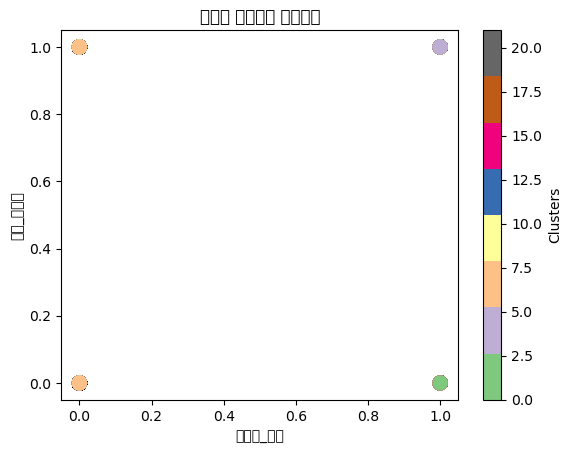

In [93]:
columns = ['날짜', '이용자수', '이용횟수', '이용액', '시도_제주도', '시군구_제주시', '읍면동_도심', '읍면동_읍면',
       '업종_교통', '업종_문화/레져', '업종_소매', '업종_쇼핑', '업종_숙박', '업종_식음료', '업종_유흥',
       '연령대_20대', '연령대_20대미만', '연령대_30대', '연령대_40대', '연령대_50대', '연령대_60대이상',
       '성별_남', '성별_여']
# # 클러스터링 객체를 생성하고 모델을 학습시킨다.
# kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state = 77)
# kmeans.fit(alco2009[columns])
# data["Clusters"] = kmeans.labels_
# centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)

# # 플로팅 스타일을 선택한다.
# matplotlib.style.use("ggplot")

# 주와 centroid를 플롯에 그린다.
ax = data.plot.scatter(columns[7], columns[13], c="Clusters", 
                           cmap=plt.cm.Accent, s=100)
#data.plot.scatter(columns[2], columns[1], color="red", marker="+", 
#                     s=200, ax=ax)

# 플롯에 제목을 붙이고 저장한다.
plt.title("제주도 신용카드 사용내역")

In [94]:
feature

,시도_제주도,시군구_제주시,읍면동_도심,읍면동_읍면,업종_교통,업종_문화/레져,업종_소매,업종_쇼핑,업종_숙박,업종_식음료,업종_유흥,연령대_20대,연령대_20대미만,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,성별_남,성별_여
0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9803,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9804,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
9805,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [95]:
from sklearn.decomposition import PCA
X = feature.copy()

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-0.99334374,  0.02906777],
       [-0.01637185, -0.99343143],
       [-0.99328776,  0.02905405],
       ...,
       [ 0.99361537, -0.02515938],
       [ 0.01629893,  0.99736551],
       [ 0.99327082, -0.02513369]])

In [96]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['Clusters'] = data['Clusters'] 
pca_df.head()

,0,1,Clusters
0,-0.993344,0.029068,2
1,-0.016372,-0.993431,18
2,-0.993288,0.029054,21
3,-0.016316,-0.993445,8
4,-0.993776,0.029098,15


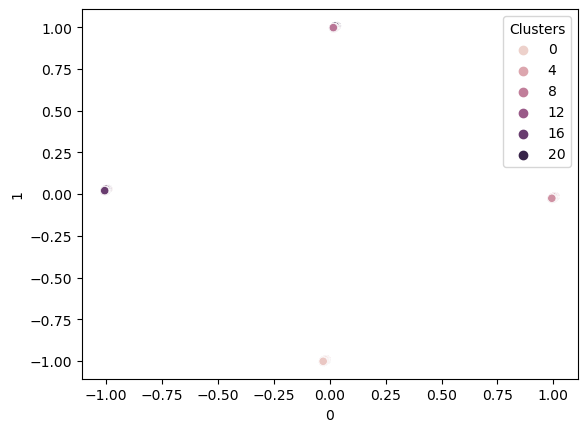

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue='Clusters', data=pca_df)